# Project Summary

In [1]:
from game import Game
from investigate_game import InvestigateGame
from random_player import RandomPlayer
from min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from q_learning import QLearningRLPlayer
from monte_carlo import MonteCarloRLPlayer
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [5]:
def plot_training_stats(rewards: list, step_size: int, switch_ratio: int | None = None) -> None:
    """
    Given a training list of rewards, this function plots the averages of the rewards
    using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean rewards value')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## Train a Q-learning player

In [ ]:
# create the Q-learning player
q_learning_rl_agent = QLearningRLPlayer(minmax=True)
# train the Q-learning player
q_learning_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {len(q_learning_rl_agent._q_table.keys())}')
# serialize the Q-learning player
q_learning_rl_agent.save('agents/q_learning_agent_1.pkl')

In [ ]:
# get the rewards
rewards = q_learning_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=5, switch_ratio=0.8)

## Train a Monte Carlo learning player

In [3]:
# create the Q-learning player
monte_carlo_rl_agent = MonteCarloRLPlayer(minmax=True)
# train the Q-learning player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {(len(monte_carlo_rl_agent._q_table.keys())):,}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

# explored state: 1617946 - Current exploration rate: 0.367883: 100%|██████████| 100000/100000 [2:15:57<00:00, 12.26it/s]  


** Last 1_000 episodes - Mean rewards value: -1.00 **
** Last rewards value: 10 **
Number of explored states: 1617946


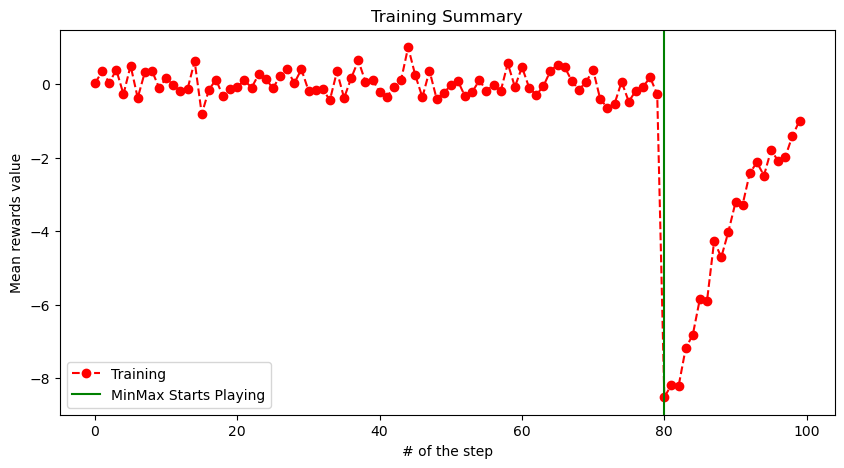

In [4]:
# get the rewards
rewards = monte_carlo_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=1000, switch_ratio=0.8)

#### Continuing the training of Montecarlo RL Player

In [7]:
# load trained Montecalrlo agent
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')
# resume training of Montecarlo player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {(len(monte_carlo_rl_agent._q_table.keys())):,}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

# explored state: 3,155,516 - Current exploration rate: 0.367883: 100%|██████████| 100000/100000 [2:18:26<00:00, 12.04it/s]  


** Last 1_000 episodes - Mean rewards value: -5.43 **
** Last rewards value: -10 **
Number of explored states: 3,155,516


In [3]:
# load trained Montecalrlo agent
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')
monte_carlo_rl_agent._exploration_decay_rate = 2e-5
# resume training of Montecarlo player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {(len(monte_carlo_rl_agent._q_table.keys())):,}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

# explored states: 4,592,694 - Current exploration rate: 0.135338: 100%|██████████| 100000/100000 [2:47:17<00:00,  9.96it/s]   


** Last 1_000 episodes - Mean rewards value: 5.38 **
** Last rewards value: 10 **
Number of explored states: 4,592,694


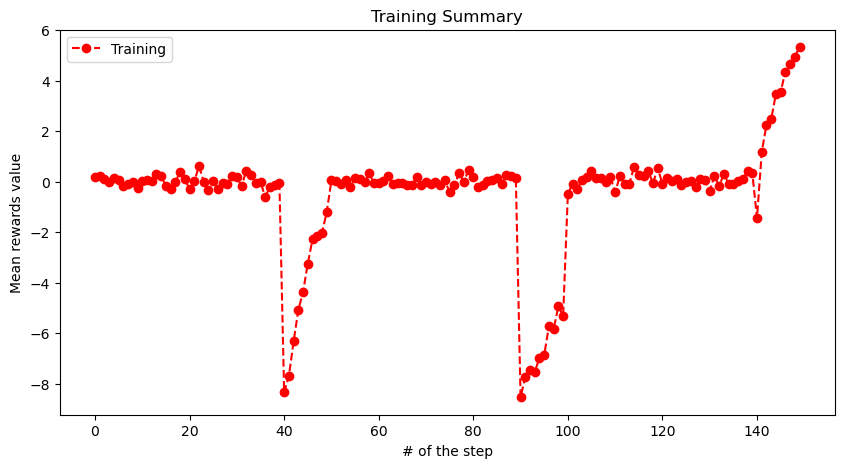

In [6]:
# get the rewards
rewards = monte_carlo_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=2000)

## Train MinMax

In [4]:
minmax_player_0 = MinMaxPlayer(0, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(minmax_player_0, rand_player)
    pbar.set_description(
        f'Hash tables entries: {(len(minmax_player_0._visited_max_states) + len(minmax_player_0._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables minmax_player_0: {(len(minmax_player_0._visited_max_states) + len(minmax_player_0._visited_min_states)):,}'
)
minmax_player_0.save('agents/minmax_player0_depth3_agent1')

Hash tables entries: 682,192: 100%|██████████| 10/10 [22:38<00:00, 135.81s/it]


Entry in the Hash tables minmax_player_0: 682,192


In [5]:
minmax_player_1 = MinMaxPlayer(1, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(rand_player, minmax_player_1)
    pbar.set_description(
        f'Hash tables entries: {(len(minmax_player_1._visited_max_states) + len(minmax_player_1._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables minmax_player_1: {(len(minmax_player_1._visited_max_states) + len(minmax_player_1._visited_min_states)):,}'
)
minmax_player_1.save('agents/minmax_player1_depth3_agent1')

Hash tables entries: 1,287,275: 100%|██████████| 10/10 [34:38<00:00, 207.88s/it]


Entry in the Hash tables minmax_player_1: 1,287,275


## Train AlphaBetaMinMax

In [ ]:
alphabeta_player_0 = MinMaxPlayer(0, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(alphabeta_player_0, rand_player)
    pbar.set_description(
        f'Hash tables entries: {(len(alphabeta_player_0._visited_max_states) + len(alphabeta_player_0._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables alphabeta_player_0: {(len(alphabeta_player_0._visited_max_states) + len(alphabeta_player_0._visited_min_states)):,}'
)
alphabeta_player_0.save('agents/alphabeta_player0_depth3_agent1')

In [ ]:
alphabeta_player_1 = MinMaxPlayer(1, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(rand_player, alphabeta_player_1)
    pbar.set_description(
        f'Hash tables entries: {(len(alphabeta_player_1._visited_max_states) + len(alphabeta_player_1._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables alphabeta_player_1: {(len(alphabeta_player_1._visited_max_states) + len(alphabeta_player_1._visited_min_states)):,}'
)
alphabeta_player_1.save('agents/alphabeta_player1_depth3_agent1')

## Play Games

In [14]:
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')
minmax_player_1 = MinMaxPlayer(1)
minmax_player_1.load('agents/minmax_player1_agent1')

In [11]:
# create the first player
player1 = monte_carlo_rl_agent
# create the second player
player2 = RandomPlayer()
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (4, 2) to the left
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (4, 1) to the bottom
⬜️⬜️⬜️⬜️⭕️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 4) to the right
⬜️⬜️⬜️⬜️⭕️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️❌
Player ⭕️ chose to move (2, 4) to the left
⬜️⬜️⬜️⬜️⭕️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⭕️⬜️
Player ❌ chose to move (0, 2) to the bottom
⬜️⬜️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⭕️⬜️
Player ⭕️ chose to move (1, 0) to the right
⭕️⬜️⬜️⭕️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⭕️⬜️
Player ❌ chose to move (4, 4) to the left
⭕️⬜️⬜️⭕️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (2, 4) to the top
⭕️⬜️⭕️⭕️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (4, 0) to the bottom
⭕️⬜️⭕️⭕️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
❌⬜️⬜️⬜️❌
Player ⭕️ chose to move (1, 4) to the left
⭕️⬜️⭕️⭕️⬜️

## Testing Players performance

In [12]:
def test(player1, player2, num_games, idx):
    wins = 0
    for _ in range(num_games):
        g = Game()
        w = g.play(player1, player2)
        if w == idx:
            wins += 1
    print(f'Percentage of wins player {idx}: {wins/num_games:%}')
    return wins / num_games

### Vs Random Player

In [13]:
random_player = RandomPlayer()
''' 
print(f'Minmax as first')
test(minmax_player_0,random_player,100)
print(f'Minmax as second')
test(random_player,minmax_player_1,100)
print(f'Alphabeta as first')
test(alphabeta_player_0,random_player,100)
print(f'Alphabeta as second')
test(random_player,alphabeta_player_1,100)
'''

print(f'Montecarlo as first')
test(monte_carlo_rl_agent, random_player, 1_000, 0)
print(f'Montecarlo as second')
test(random_player, monte_carlo_rl_agent, 1_000, 1)

Montecarlo as first
Percentage of wins player 0: 52.500000%
Montecarlo as second
Percentage of wins player 1: 52.100000%


0.521

### Minmax vs Montecarlo

In [18]:
print(f'Montecarlo as first')
test(monte_carlo_rl_agent, MinMaxPlayer(1, depth=2), 50, 0)

Montecarlo as first
Percentage of wins player 0: 0.000000%


0.0